<a href="https://colab.research.google.com/github/filipe4ndrade/Analise_de_Sentimento_twitter/blob/main/AnalisedeSentimentoTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando os Dados**

In [ ]:
#importar arquivo do drive

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#procurar o diretório 

!ls '/content/drive/MyDrive/ADS/Inovação/racist_or_sexist_tweets.csv'

/content/drive/MyDrive/ADS/Inovação/racist_or_sexist_tweets.csv


## **Analisando os Dados**

In [ ]:
#Fazendo análise de dados usando as bibliotecas

import numpy as np # biblioteca numpy é importante para operações matemáticas e trabalhar com matrizes (tabelas)
import pandas as pd # biblioteca pandas é importante para extrairmos informações e modificar banco de dados

dados = pd.read_csv('/content/drive/MyDrive/ADS/Inovação/racist_or_sexist_tweets.csv', sep = ',')

In [ ]:
dados.shape #nos diz o tamanho do dados, são 32 mil linhas e 3 colunas

(31962, 3)

In [ ]:
dados.head() #Imprime a "cabeça" dos dados (5 primeiras linhas)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
#Concluimos que a coluna id não influencia em nada no nosso dado, então retiramos.
dados=dados.drop(['id'],axis=1) # comando drop retira a coluna tweetid, o axis = 1 só uma confirmação que afirma que tweetid é coluna.
dados.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
dados.isna().sum() #verificando se o arquivo tem dados faltando 

label    0
tweet    0
dtype: int64

In [ ]:
#Fazendo Nuvem de tags
#1) Para as palavras mais frequentes nos tweets preconseituosos
preconceituosos = dados.loc[dados['label']==1] #Comando loc seleciona os dados dentro dos []. 
#Os dados dentro do colchete são apenas os valores da coluna Label que tem valor 1, ou seja, os racistas.
textoRac = preconceituosos.dropna(subset=['tweet'], axis=0)['tweet']  #Seleciona o a coluna de texto
cloud1 = " ".join(s for s in textoRac)  #separa as palavras do texto em "".

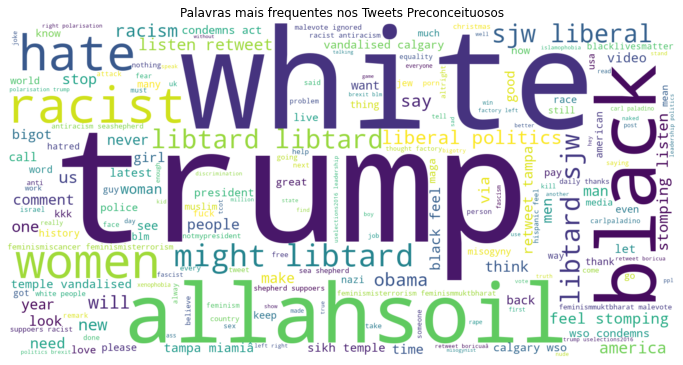

In [ ]:
import matplotlib.pyplot as plt  #Biblioteca para gráfico
from wordcloud import WordCloud, STOPWORDS   #Biblioteca para word clouds

stopwords = set(STOPWORDS)  #importando comando que retira palavras desnecessárias
stopwords.update(['the','it','a','as','for','and','user','amp'])  #algumas palavras desnecessárias que podem ter nos nossos dados tbm.
plt.figure(figsize=(12,10)) #seleciona o tamanho da janela
words = WordCloud(stopwords = stopwords, background_color="white", width=1600, height=800).generate(cloud1) #Cria o wordcloud, com fundo branco e tamanho 1600x800
plt.imshow(words, interpolation="bilinear") # importa o wordcloud na janela
plt.axis('off')
plt.title("Palavras mais frequentes nos Tweets Preconceituosos");


In [ ]:
#1) Para as palavras mais frequentes nos tweets preconseituosos

sadios = dados.loc[dados['label']==0] #Comando loc seleciona os dados dentro dos []. 
#Os dados dentro do colchete são apenas os valores da coluna Label que tem valor 0, ou seja, os nãos preconceituosos.
textoNoRac = sadios.dropna(subset=['tweet'], axis=0)['tweet']  #Seleciona o a coluna de texto
cloud2 = " ".join(s for s in textoNoRac)  #separa as palavras do texto em "".

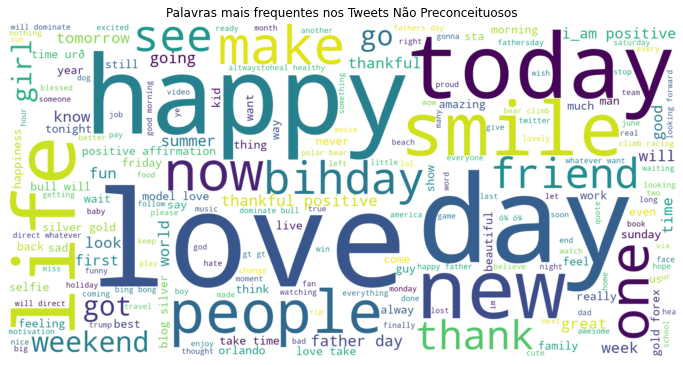

In [ ]:
import matplotlib.pyplot as plt  #Biblioteca para gráfico
from wordcloud import WordCloud, STOPWORDS   #Biblioteca para word clouds

stopwords = set(STOPWORDS)  #importando comando que retira palavras desnecessárias
stopwords.update(['the','it','a','as','for','and','user','amp'])  #algumas palavras desnecessárias que podem ter nos nossos dados tbm.
plt.figure(figsize=(12,10)) #seleciona o tamanho da janela
words = WordCloud(stopwords = stopwords, background_color="white", width=1600, height=800).generate(cloud2) #Cria o wordcloud, com fundo branco e tamanho 1600x800
plt.imshow(words, interpolation="bilinear") # importa o wordcloud na janela
plt.axis('off')
plt.title("Palavras mais frequentes nos Tweets Não Preconceituosos");

## **Processando os Dados**

In [ ]:
#Em um banco de dados para inteligência artificial, sempre temos que definir quem são as classes, e quem são
#os atributos dessas classes. Por exemplo, a classe Animal contém: gato, cachorro, papagaio; e seus atributos 
#seriam suas características: altura, comprimento, presença de pelo (sim, não), presença de bico (sim, não)...
#************************************

#No nosso problema, a classe é sentimentos, e estes são referidos a opinião sobre mudanças climáticas, que como já foi mencionado:
#pró, contra, neutro, link. E seus atributos são as mensagens do twitter. 

#Separando nosso arquivo em variável atributo (x) (as mensagens) e classe (y) ( os sentimentos)

y = dados['label']
x = dados['tweet']

# Uma IA precisa de uma parte de seus dados para fazer treinamento e outra parte para ela treinar. Exemplo: temos uma base de dados 
#com fotos de animais, 5 raças de cachorros e 5 raças de gatos (10 dados ou 10 instâncias) e precisamos ensinar uma criança a aprender classificar bem um 
#animal em gato ou cachorro. Daí precisamos serparar esses dados em treimento e teste. Decidimos que 80% será treinamento e 20% teste.
#O treinamento, então, seria como se pegassemos  4 desses cachorros e 4 desses gatos (totalizando 80%) e mostrasse pra criança: -isso é 
#um auau; -isso é um miau... No caso, sobrarímos 1 cachorro e 1 gato (20%) para testarmos na criança:- que animal é esse? se ela errar os dois, teremos 
#uma acurácia de 0%, se acertar um dos dois, 50%, se acertar todos, 100%. Essa acurácia então, nos dias o quão efiente fomos nós em ensinar 
#a criança a distinguir gato de cachorro.

#Separando os dados em parte de treinamento e parte de teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.3) # Aqui vemos que temos 4 variáveis. As variáveis x_treino e x_teste
#são referidas ao atributo menssagens (message), sendo uma parte pra treino e outra pra teste. As variáveis y_treino e y_teste
#são referidas a classe sentimentos (sentiment), sendo uma parte pra treino e outra pra teste. 0 0.3 diz que 30% dos dados serão para teste enquanto
#70% será para treino (vimos anteriormetente que temos 43 mil dados, bem diferente das 10 fotos de gatos e cachorros comentadas).

In [ ]:
# Agora precisamos que os dados de message sejam bem definidos, logo, precisamos de um comando que separe palava por palavra de cada frase,
#pois a nossa IA irá fazer a classificação dos sentimentos pela frequência de cada palavra relacionada aos sentimentos.
#Para isso, usamos a operação de vetorização que faz essa divisão de palavras. E para que cada palavra seja inteligível pra o algoritmo, então 
#é necessário transformar em binárias. '''

#precisamos vetorizar os dados, quando trabalhamos com palavras devemos transformar em números binários
from sklearn.feature_extraction.text import TfidfVectorizer

vetorizar = TfidfVectorizer(analyzer='word',ngram_range = (1,1)) # Esses comando vetoriza. Analyzer faz a separação das frases por palavras e ngram_range conta 1 a 1 palavras. 

frasesVetorizadasTreino = vetorizar.fit_transform(x_treino)  #comando fit_transform faz a transformação
frasesVetorizadasTeste = vetorizar.transform(x_teste)

#Note que vetorizamos apenas as varipaveis X, pq a Y já são numéricas.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


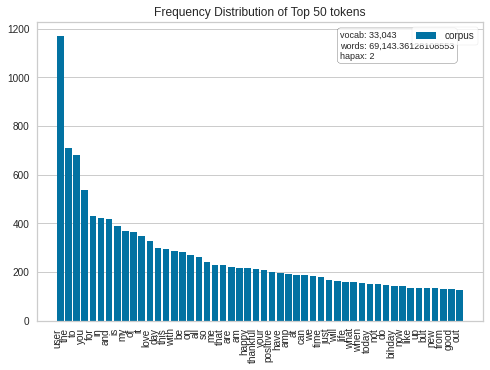

In [ ]:
#verificando as palavras mais comum nos dados
# Nessas linhas de comando, estamos verificando quasi palavras são mais frequentes em message 
from yellowbrick.text import FreqDistVisualizer

palavras = vetorizar.get_feature_names()
visualizar = FreqDistVisualizer(features= palavras, orient='v')

visualizar.fit(frasesVetorizadasTreino)
visualizar.show()



In [ ]:
#Organizando as Classes para deixá-las de forma binárias também,elas são numéricas mas não binárias.
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
rotuloTreino = mlb.fit_transform(map(str,y_treino))
rotuloTeste = mlb.fit_transform(map(str,y_teste))


##**Classificação**

In [ ]:
# Agora chegamos na etapa de Classificação. Nessa etapa nós escolhemos vários classificadores para fazer o treinamento do nosso algoritmo.
#No exemplo da criança, o classificador seria a pessoa que faz o treinamento. No caso, cada pessoa teria uma metodologia diferente para ensinar
#a criança, assim, cada classificador também tem uma metodologia de aprendizado, que não vem ao caso agora. Basta usarmos!
#No final, precisamos de métricas para saber o desempenho de cada classificador: Acurácia, precisão, n° kappa, sensibilidade, especificidade...
#nesse algoritmo só estamos usando acurácia por enquanto, pois é medida mais importante visto no exemplo.

#Serão usado os classificadores árvores de decisão, floresta de decisão e KNneighbors (iremos usar outras tbm).

#1)
#Usando o Classificador ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


#Criação de modelo

modelo1 = ExtraTreesClassifier()   #importando nosso classificador para variável modelo1;
modelo1.fit(frasesVetorizadasTreino,rotuloTreino) 
previsoes1 = modelo1.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes1)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes1, rotuloTeste)) # exibe acurácia


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8896
           1       0.90      0.51      0.65       693

   micro avg       0.96      0.96      0.96      9589
   macro avg       0.93      0.75      0.81      9589
weighted avg       0.96      0.96      0.96      9589
 samples avg       0.96      0.96      0.96      9589

A acurácia é  0.9601626864115131


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


O classificador ExtraTreesClassifier classificou corretamente 96% dos dados. MUITO BOM!!

In [ ]:
#Usando o Classificador KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Criação de modelo

modelo2 = KNeighborsClassifier()
modelo2.fit(frasesVetorizadasTreino,rotuloTreino)
previsoes2 = modelo2.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes2)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes2, rotuloTeste)) # exibe acurácia

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8896
           1       0.92      0.27      0.42       693

   micro avg       0.95      0.95      0.95      9589
   macro avg       0.93      0.63      0.70      9589
weighted avg       0.94      0.95      0.93      9589
 samples avg       0.95      0.95      0.95      9589

A acurácia é  0.9456669100010429


O classificador KNeighborsClassifier classificou corretamente 94% dos dados

In [ ]:
#Usando o Classificador DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Criação de modelo

modelo3 = DecisionTreeClassifier()
modelo3.fit(frasesVetorizadasTreino,rotuloTreino)
previsoes3 = modelo3.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes3)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes3, rotuloTeste)) # exibe acurácia

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8896
           1       0.63      0.53      0.57       693

   micro avg       0.94      0.94      0.94      9589
   macro avg       0.80      0.75      0.77      9589
weighted avg       0.94      0.94      0.94      9589
 samples avg       0.94      0.94      0.94      9589

A acurácia é  0.943372614454062


In [ ]:
#Usando o Classificador RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Criação de modelo

modelo4 = RandomForestClassifier()
modelo4.fit(frasesVetorizadasTreino,rotuloTreino)
previsoes4 = modelo4.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes4)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes4, rotuloTeste)) # exibe acurácia


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8896
           1       0.94      0.40      0.57       693

   micro avg       0.96      0.96      0.96      9589
   macro avg       0.95      0.70      0.77      9589
weighted avg       0.96      0.96      0.95      9589
 samples avg       0.96      0.96      0.96      9589

A acurácia é  0.9551569506726457


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Usando o Classificador RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier # algoritmos binários
from sklearn.svm import LinearSVC

#Criação de modelo

modelo5 =  OneVsRestClassifier(LinearSVC(), n_jobs=-1)
modelo5.fit(frasesVetorizadasTreino,rotuloTreino)
previsoes5 = modelo5.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes5)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes5, rotuloTeste)) # exibe acurácia

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8896
           1       0.89      0.56      0.69       693

   micro avg       0.96      0.96      0.96      9589
   macro avg       0.93      0.78      0.83      9589
weighted avg       0.96      0.96      0.96      9589
 samples avg       0.96      0.96      0.96      9589

A acurácia é  0.9630826989258525


In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Criação de modelo

modelo6 =  OneVsRestClassifier(MultinomialNB())
modelo6.fit(frasesVetorizadasTreino,rotuloTreino)
previsoes6 = modelo6.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes6)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes6, rotuloTeste)) # exibe acurácia

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8896
           1       1.00      0.09      0.17       693

   micro avg       0.93      0.93      0.93      9589
   macro avg       0.97      0.55      0.57      9589
weighted avg       0.94      0.93      0.91      9589
 samples avg       0.93      0.93      0.93      9589

A acurácia é  0.9342997184273647


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Criação de modelo

modelo7 =   OneVsRestClassifier(GradientBoostingClassifier())
modelo7.fit(frasesVetorizadasTreino,rotuloTreino)
previsoes7 = modelo7.predict(frasesVetorizadasTeste)

print(classification_report(rotuloTeste, previsoes7)) # mostra relatório 
print('A acurácia é ',accuracy_score(previsoes7, rotuloTeste)) # exibe acurácia

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8896
           1       0.90      0.26      0.41       693

   micro avg       0.94      0.94      0.94      9589
   macro avg       0.92      0.63      0.69      9589
weighted avg       0.94      0.94      0.93      9589
 samples avg       0.94      0.94      0.94      9589

A acurácia é  0.9439983314214204


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
